In [1]:
import sys
import os

# Assuming notebooks and src are subdirectories of the project directory
parent_dir = os.path.dirname(os.path.dirname(os.path.abspath("__file__")))
sys.path.append(os.path.join(parent_dir, 'src'))
from importlib import reload

In [2]:
import torch

import logitlens
import utils
import viz
import cluster
reload(utils)

/u/jdr/venvs/venv_lexcons/lib/python3.10/site-packages/transformers/utils/hub.py:128: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(


<module 'utils' from '/datastor1/jdr/lexical-inconsistency/nnsight/lex/src/utils.py'>

Pearson:  0.780615670302538
Pearson for pos:  0.5381100052854741
Pearson for neg:  0.4742380154859837


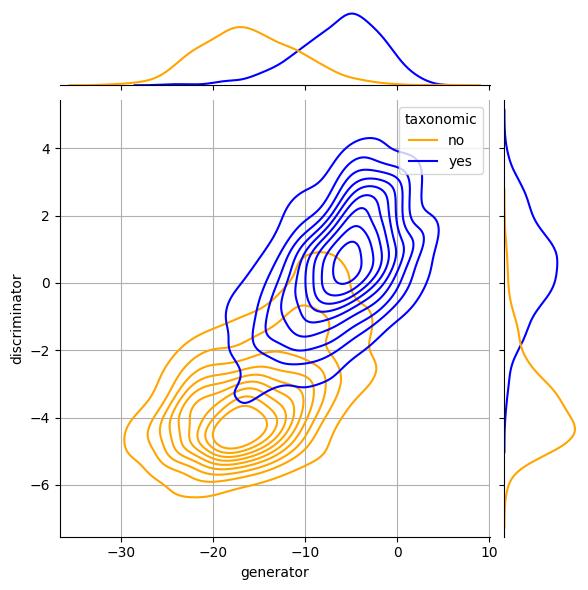

In [3]:
L = utils.load_noun_pair_data() 
L_train, L_test = utils.split_train_test(L, seed=0, subsample=False, num_train=3000)

disc = torch.load('../outputs/logodds/gemma-2-2b--disc-few.pt', weights_only=True)
gen = torch.load('../outputs/logodds/gemma-2-2b--gen-zero.pt', weights_only=True)
viz.plot_correlations(L_test, gen, disc)

In [13]:
L = utils.load_noun_pair_data() 
L_train, L_test = utils.split_train_test(L, seed=0, subsample=False, num_train=3000)

disc = torch.load('../outputs/logodds/gemma-2-2b--disc-few--train.pt', weights_only=True)
gen = torch.load('../outputs/logodds/gemma-2-2b--gen-zero--train.pt', weights_only=True)
viz.plot_correlations(L_train, gen, disc)

RuntimeError: PytorchStreamReader failed reading zip archive: failed finding central directory

In [33]:
L = utils.load_noun_pair_data() 
L_train, L_test = utils.split_train_test(L, seed=0, subsample=False, num_train=3000)

disc = torch.load('../outputs/logodds/v1-epoch2--disc-few.pt', weights_only=True)
gen = torch.load('../outputs/logodds/v1-epoch2--gen-zero.pt', weights_only=True)

Pearson:  0.2266151302239436
Pearson for pos:  0.36456579993931737
Pearson for neg:  0.07170493648315229


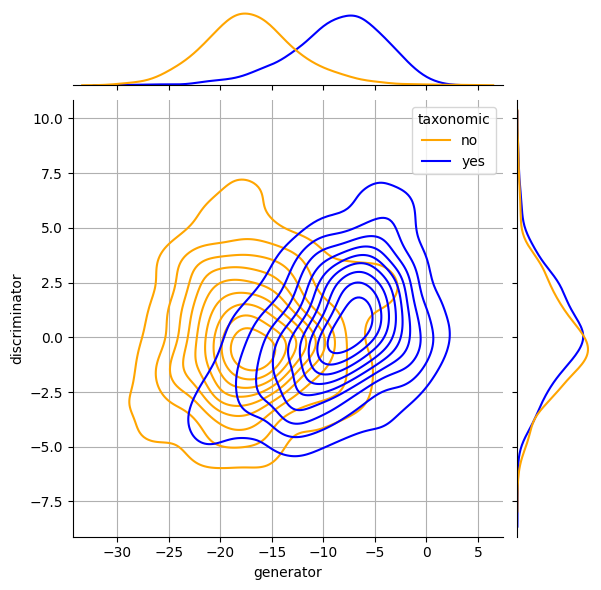

In [34]:
viz.plot_correlations(L_test, gen, disc)

Pearson correlation:  0.986307031139624


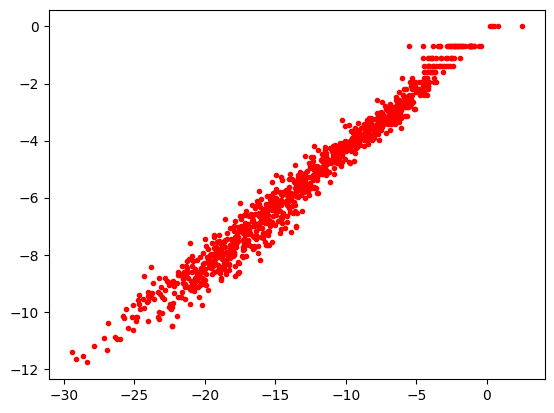

In [36]:
import json
import numpy as np
#gen_pos = torch.load('../outputs/logodds/ftmodel--gemma-2-2b--generator--zero--pos--gen-zero.pt', weights_only=True)
with open('../outputs/logodds/v1-epoch2--gen-zero--ranks.json', 'r') as fd:
    gen_ranks = json.load(fd)
neglogrank = -np.log(gen_ranks)

import matplotlib.pyplot as plt
from scipy.stats import pearsonr
last_layer_logodds = [i[-1] for i in gen]
plt.plot(last_layer_logodds, neglogrank, 'r.')

print("Pearson correlation: ", pearsonr(last_layer_logodds, neglogrank).statistic)


In [42]:
last_layer_logodds_pos = [i for ii,i in enumerate(last_layer_logodds) if L_test[ii].taxonomic == 'yes' ]

In [43]:
last_layer_logodds_neg = [i for ii,i in enumerate(last_layer_logodds) if L_test[ii].taxonomic == 'no' ]

In [39]:
neglogrank[0]

np.float64(-6.54965074223381)

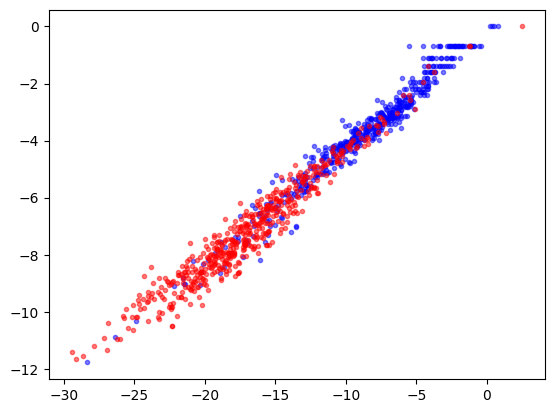

In [54]:
plt.plot(last_layer_logodds_pos, [i for ii,i in enumerate(neglogrank) if L_test[ii].taxonomic=='yes'], 'b.', alpha=.5)
plt.plot(last_layer_logodds_neg, [i for ii,i in enumerate(neglogrank) if L_test[ii].taxonomic=='no'], 'r.', alpha=.5)


In [55]:
import math
last_layer_logprobs_pos = [-math.log(1+math.exp(-l.tolist())) for l in last_layer_logodds_pos[:]]
last_layer_logprobs_neg = [-math.log(1+math.exp(-l.tolist())) for l in last_layer_logodds_neg[:]]


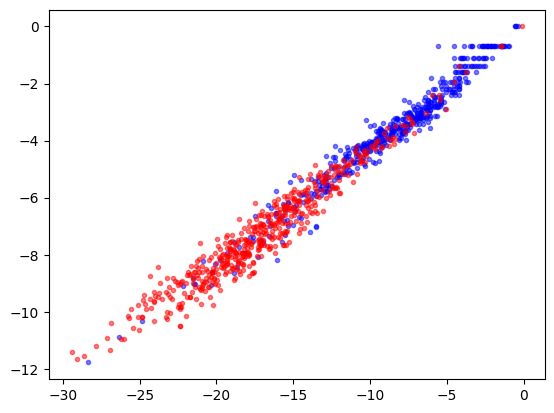

In [56]:
plt.plot(last_layer_logprobs_pos, [i for ii,i in enumerate(neglogrank) if L_test[ii].taxonomic=='yes'], 'b.', alpha=.5)
plt.plot(last_layer_logprobs_neg, [i for ii,i in enumerate(neglogrank) if L_test[ii].taxonomic=='no'], 'r.', alpha=.5)


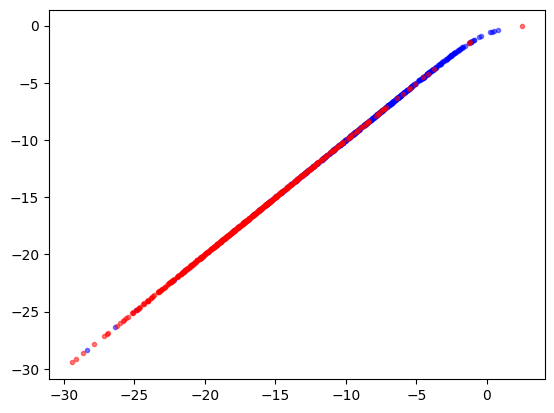

In [58]:
plt.plot(last_layer_logodds_pos, last_layer_logprobs_pos, 'b.', alpha=.5)
plt.plot(last_layer_logodds_neg, last_layer_logprobs_neg, 'r.', alpha=.5)
# Of course, for very negative values of log-odds, logodds ~= log probs

(array([ 3.,  4., 13., 23., 33., 56., 76., 78., 76., 52., 38., 24., 13.,
        13.,  3.,  4.,  1.,  2.,  0.,  1.]),
 array([-29.43958473, -27.84144211, -26.24329948, -24.64515686,
        -23.04701614, -21.44887352, -19.8507309 , -18.25259018,
        -16.65444565, -15.05630398, -13.45816231, -11.86001968,
        -10.26187706,  -8.66373444,  -7.06559372,  -5.4674511 ,
         -3.86930847,  -2.27116585,  -0.67302322,   0.92511749,
          2.52326035]),
 <BarContainer object of 20 artists>)

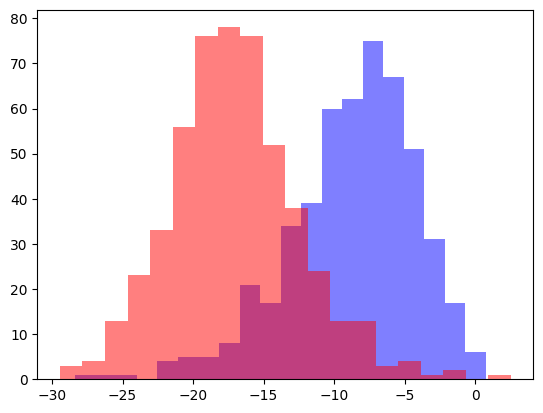

In [46]:
plt.hist(last_layer_logodds_pos, color='b', alpha=.5, bins=20)
plt.hist(last_layer_logodds_neg, color='r', alpha=.5, bins=20)

In [7]:
# ok let's look at correlations on the TRAIN set to see what is going on..
L = utils.load_noun_pair_data() 
L_train, L_test = utils.split_train_test(L, seed=0, subsample=False, num_train=3000)

disc = torch.load('../outputs/logodds/v1-epoch2--disc-few--train.pt', weights_only=True)
gen = torch.load('../outputs/logodds/v1-epoch2--gen-zero--train.pt', weights_only=True)

In [8]:
len(gen)


3000

Pearson:  0.3284335917117254
Pearson for pos:  0.5447486793160088
Pearson for neg:  0.14105111272381243


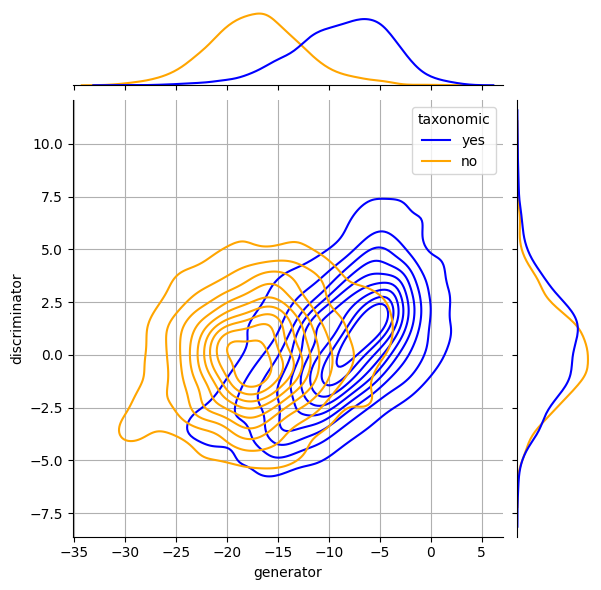

In [11]:
viz.plot_correlations(L_train, gen, disc)

In [12]:
# OK something is not right.  Let's look at the 5-epoch version.

In [13]:
# ok let's look at correlations on the TRAIN set to see what is going on..
disc = torch.load('../outputs/logodds/v1-epoch5--disc-few--train.pt', weights_only=True)
gen = torch.load('../outputs/logodds/v1-epoch5--gen-zero--train.pt', weights_only=True)

Pearson:  0.3438381420605695
Pearson for pos:  0.43802814590412525
Pearson for neg:  0.14473924870544158


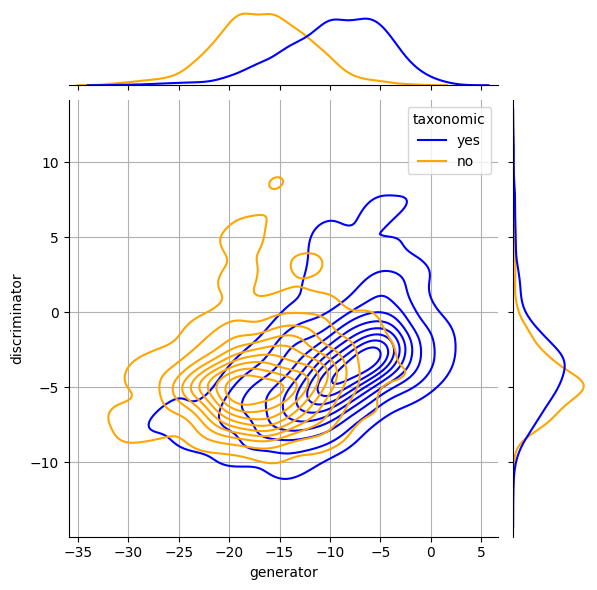

In [14]:
viz.plot_correlations(L_train, gen, disc)

In [16]:
## WHY isn't this working?? Go back and look at wandb...

In [20]:
# 31 epochs
L = utils.load_noun_pair_data() 
L_train, L_test = utils.split_train_test(L, seed=0, subsample=False, num_train=3000)
disc = torch.load('../outputs/logodds/v2-epoch21--disc-few--train.pt', weights_only=True)
gen = torch.load('../outputs/logodds/v2-epoch21--gen-zero--train.pt', weights_only=True)

Pearson:  0.22694693127846385
Pearson for pos:  0.3524584017523201
Pearson for neg:  0.03716557918093596


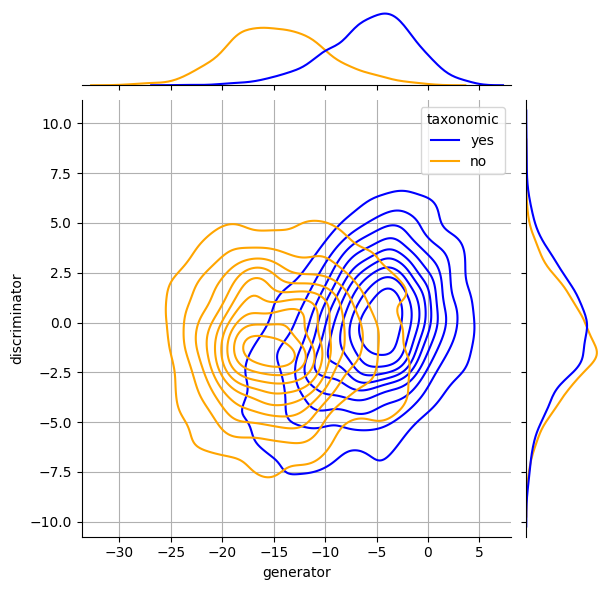

In [21]:
viz.plot_correlations(L_train, gen, disc)

In [18]:
# 31 epochs
L = utils.load_noun_pair_data() 
L_train, L_test = utils.split_train_test(L, seed=0, subsample=False, num_train=3000)
disc = torch.load('../outputs/logodds/v2debug-epoch11--disc-few--train.pt', weights_only=True)
gen = torch.load('../outputs/logodds/v2debug-epoch11--gen-zero--train.pt', weights_only=True)


Pearson:  0.8748238737632028
Pearson for pos:  0.8330295412165769
Pearson for neg:  0.7000925813627734


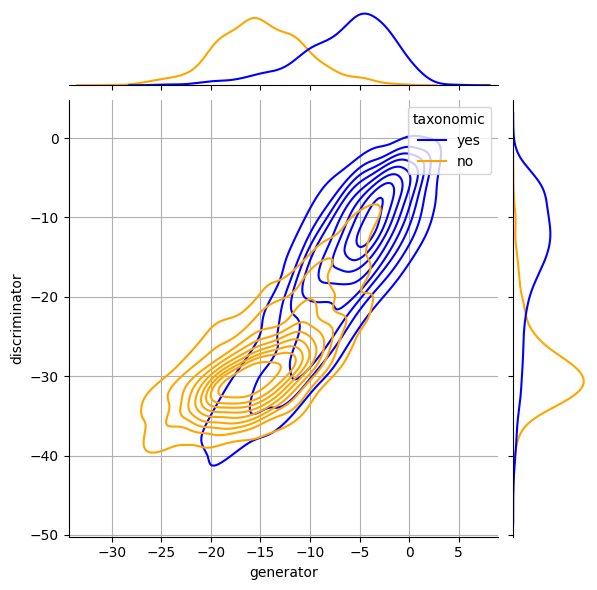

In [19]:
viz.plot_correlations(L_train, gen, disc)

In [24]:

L = utils.load_noun_pair_data() 
L_train, L_test = utils.split_train_test(L, seed=0, subsample=False, num_train=3000)
disc = torch.load('../outputs/logodds/v2debug-epoch11--disc-few--train.pt', weights_only=True)
gen = torch.load('../outputs/logodds/v2debug-epoch11--gen-zero--train.pt', weights_only=True)

Pearson:  0.8748238737632028
Pearson for pos:  0.8330295412165769
Pearson for neg:  0.7000925813627734


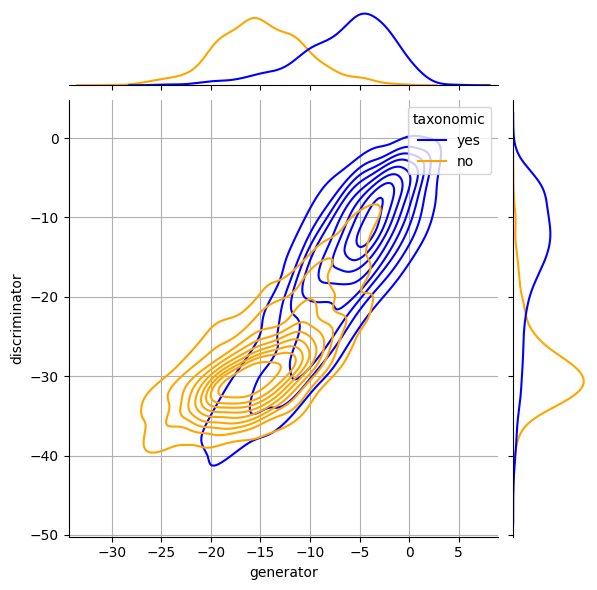

In [25]:
viz.plot_correlations(L_train, gen, disc)

In [26]:
# Now on the test set!

Pearson:  0.86315658691113
Pearson for pos:  0.7974880599313061
Pearson for neg:  0.6949956771039643


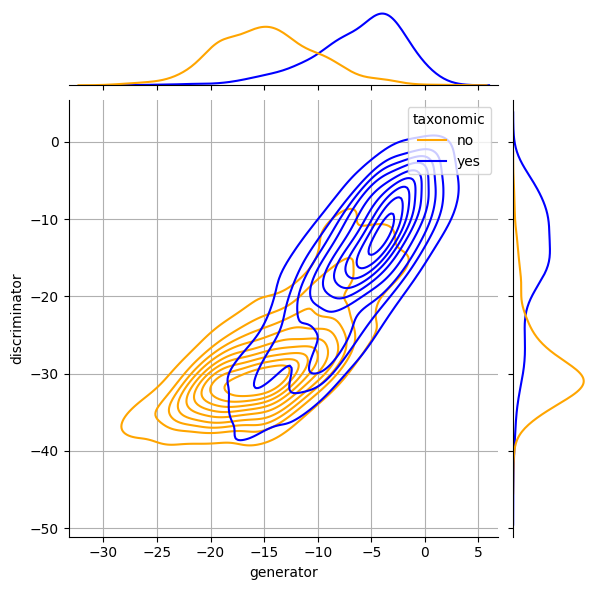

In [27]:

L = utils.load_noun_pair_data() 
L_train, L_test = utils.split_train_test(L, seed=0, subsample=False, num_train=3000)
disc = torch.load('../outputs/logodds/v2debug-epoch11--disc-few.pt', weights_only=True)
gen = torch.load('../outputs/logodds/v2debug-epoch11--gen-zero.pt', weights_only=True)
viz.plot_correlations(L_test, gen, disc)

Pearson:  0.7807181631717468
Pearson for pos:  0.5382657283235188
Pearson for neg:  0.47390051474619527


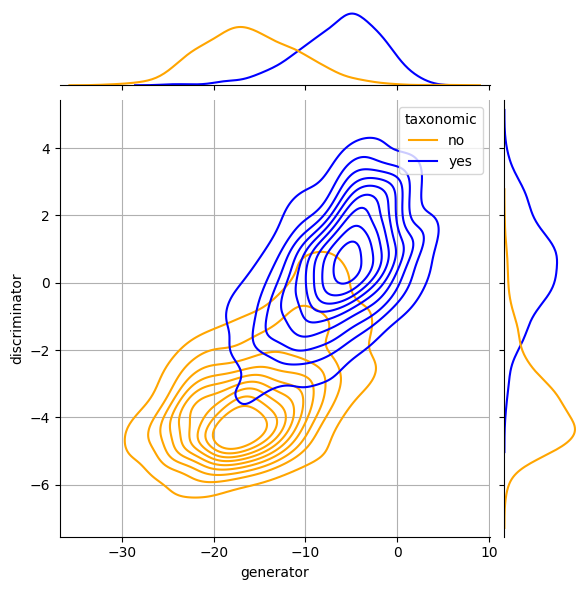

In [16]:

L = utils.load_noun_pair_data() 
L_train, L_test = utils.split_train_test(L, seed=0, subsample=False, num_train=3000)
disc = torch.load('../outputs/logodds/v3-delta5-epoch0--disc-few.pt', weights_only=True)
gen = torch.load('../outputs/logodds/v3-delta5-epoch0--gen-zero.pt', weights_only=True)
viz.plot_correlations(L_test, gen, disc)

Pearson:  0.8008152390241456
Pearson for pos:  0.7752805059925871
Pearson for neg:  0.6105767616846847


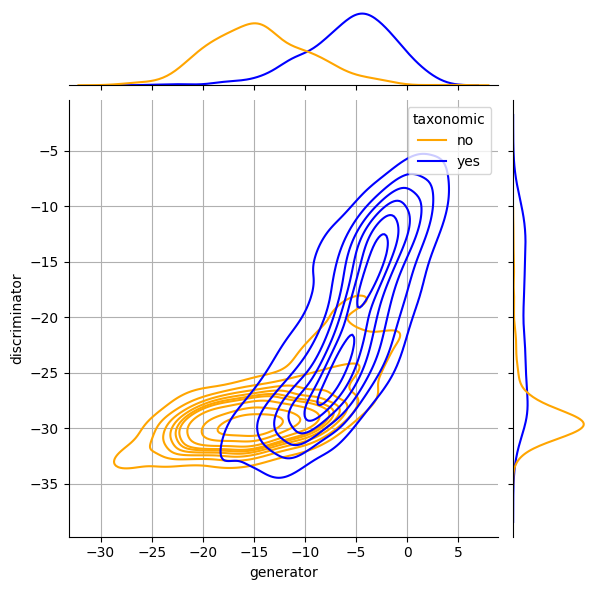

In [17]:

L = utils.load_noun_pair_data() 
L_train, L_test = utils.split_train_test(L, seed=0, subsample=False, num_train=3000)
disc = torch.load('../outputs/logodds/v3-delta5-epoch1--disc-few.pt', weights_only=True)
gen = torch.load('../outputs/logodds/v3-delta5-epoch1--gen-zero.pt', weights_only=True)
viz.plot_correlations(L_test, gen, disc)

Pearson:  0.8337447206307416
Pearson for pos:  0.8121180785861413
Pearson for neg:  0.6573357077272879


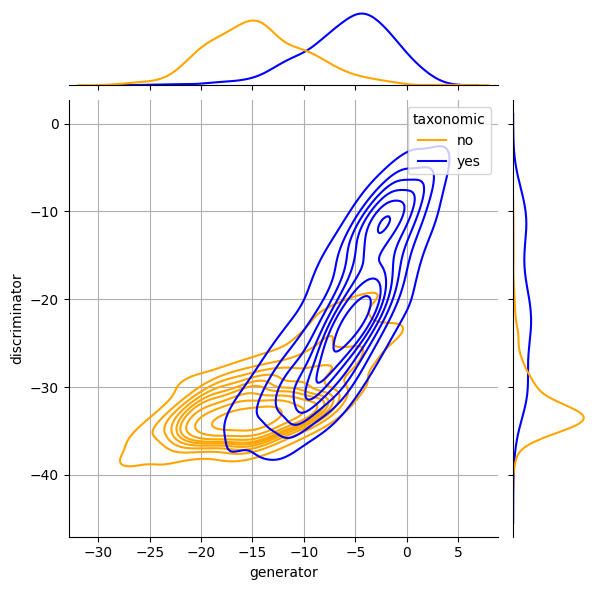

In [18]:

L = utils.load_noun_pair_data() 
L_train, L_test = utils.split_train_test(L, seed=0, subsample=False, num_train=3000)
disc = torch.load('../outputs/logodds/v3-delta5-epoch2--disc-few.pt', weights_only=True)
gen = torch.load('../outputs/logodds/v3-delta5-epoch2--gen-zero.pt', weights_only=True)
viz.plot_correlations(L_test, gen, disc)

Pearson:  0.838130250833867
Pearson for pos:  0.8180730056857688
Pearson for neg:  0.6500079278747077


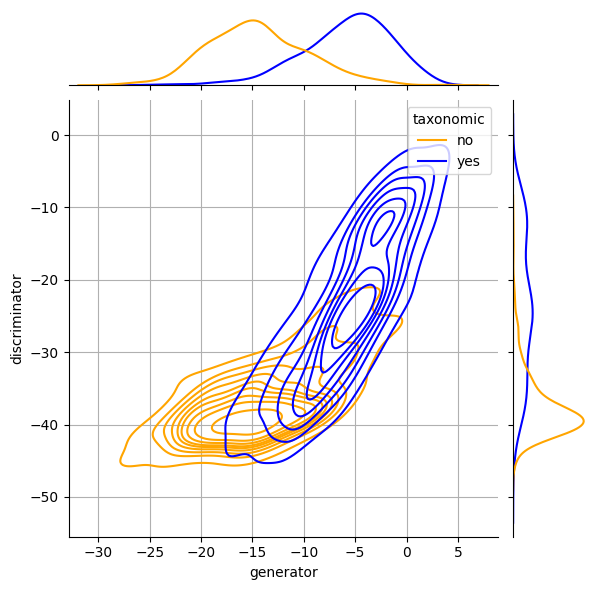

In [19]:

L = utils.load_noun_pair_data() 
L_train, L_test = utils.split_train_test(L, seed=0, subsample=False, num_train=3000)
disc = torch.load('../outputs/logodds/v3-delta5-epoch3--disc-few.pt', weights_only=True)
gen = torch.load('../outputs/logodds/v3-delta5-epoch3--gen-zero.pt', weights_only=True)
viz.plot_correlations(L_test, gen, disc)

Pearson:  0.8388399878012807
Pearson for pos:  0.8190978336399939
Pearson for neg:  0.6472119003456964


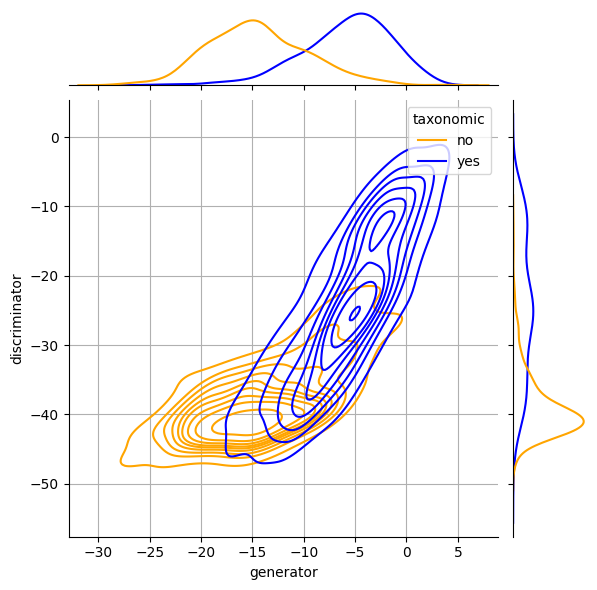

In [20]:

L = utils.load_noun_pair_data() 
L_train, L_test = utils.split_train_test(L, seed=0, subsample=False, num_train=3000)
disc = torch.load('../outputs/logodds/v3-delta5-epoch4--disc-few.pt', weights_only=True)
gen = torch.load('../outputs/logodds/v3-delta5-epoch4--gen-zero.pt', weights_only=True)
viz.plot_correlations(L_test, gen, disc)

# Now, check for generalization to unseen hypernyms.



{'mammal', 'clothing', 'drink', 'game', 'food', 'office supply', 'footwear', 'condiment', 'toy', 'toiletry', 'seafood', 'accessory', 'livestock', 'bird', 'sea animal', 'electronic device', 'protective clothing', 'furniture', 'school supply', 'plant', 'headwear', 'fruit', 'vegetable', 'outerwear', 'insect', 'dessert', 'weapon', 'animal', 'medical equipment', 'candy', "women's clothing", 'water vehicle', 'fastener', 'breakfast'}


Test set:
{'jewelry', 'tool', 'auto part', 'kitchen equipment', 'container', 'home decor', 'kitchen tool', 'musical instrument', 'garden tool', 'vehicle'}
Pearson:  0.8150526070509784
Pearson for pos:  0.5884505818147691
Pearson for neg:  0.665511878048438


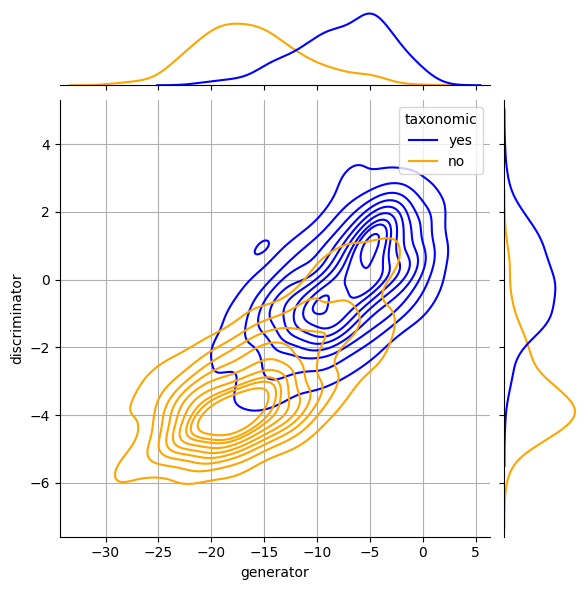

In [43]:
# Now, check for generalization to unseen hypernyms.


#FIRST: original models on the new test set comprised of

L = utils.load_noun_pair_data() 
L_train, L_test = utils.split_train_test_no_overlap(L, seed=0)

# check set of hypernyms:

print(set([i.noun2 for i in L_train]))
print("\n\nTest set:")
print(set([i.noun2 for i in L_test]))



disc = torch.load('../outputs/logodds/gemma-2-2b--disc-few--hyper.pt', weights_only=True)
gen = torch.load('../outputs/logodds/gemma-2-2b--gen-zero--hyper.pt', weights_only=True)
viz.plot_correlations(L_test, gen, disc)

Pearson:  0.8383537586559191
Pearson for pos:  0.7365872117949388
Pearson for neg:  0.7170864545922921


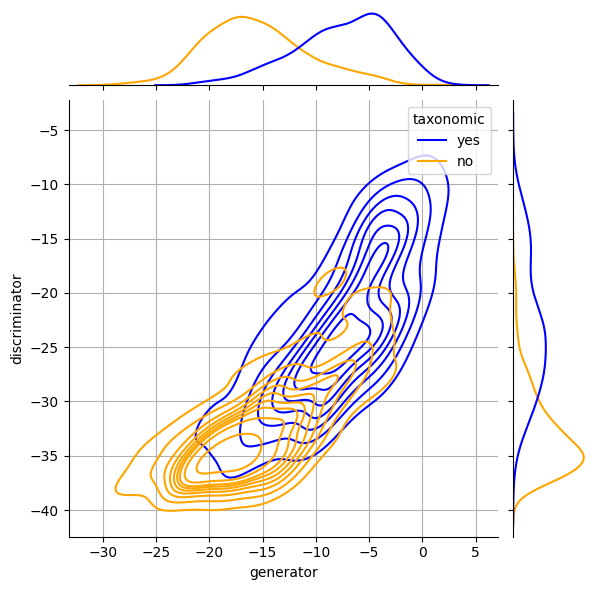

In [44]:
# Now, check for generalization to unseen hypernyms.



L = utils.load_noun_pair_data() 
L_train, L_test = utils.split_train_test_no_overlap(L, seed=0)

disc = torch.load('../outputs/logodds/v3-delta5-no-overlap-hyper-epoch4--disc-few--hyper.pt', weights_only=True)
gen = torch.load('../outputs/logodds/v3-delta5-no-overlap-hyper-epoch4--gen-zero--hyper.pt', weights_only=True)
viz.plot_correlations(L_test, gen, disc)

In [37]:
# check if there is no overlap in hypernyms just sanity check
def f(x, n): return [i.noun2 for i in x]

In [38]:
len([i for i in L_test if i.noun2 in f(L_train,1)])

0

In [ ]:
# Conclusion! Yes, it generalizes to pairs with no overlap in hyp!


# DO AGAIN, but now make sure there is no overlap in either hypo or hyper..

 ok there is a lot of overlap, so had to exclude some of them... 
 will use 2676 for train, 419 for test!

In [49]:
#AGAIN, but now make sure there is no overlap in either hypo or hyper..
# ok there is a lot of overlap, so had to exclude some of them... 
# will use 2676 for train, 419 for test!
reload(utils)


<module 'utils' from '/datastor1/jdr/lexical-inconsistency/nnsight/lex/src/utils.py'>

In [50]:

L = utils.load_noun_pair_data() 
L_train, L_test = utils.split_train_test_no_overlap_both(L)
# check set of hypernyms:

print(set([i.noun2 for i in L_train]))
print("\n\nTest set:")
print(set([i.noun2 for i in L_test]))

{'container', 'clothing', 'drink', 'home decor', 'game', 'food', 'musical instrument', 'office supply', 'footwear', 'toy', 'condiment', 'toiletry', 'accessory', 'livestock', 'bird', 'electronic device', 'protective clothing', 'furniture', 'school supply', 'plant', 'headwear', 'fruit', 'kitchen equipment', 'vegetable', 'kitchen tool', 'outerwear', 'garden tool', 'dessert', 'weapon', 'vehicle', 'medical equipment', 'jewelry', 'tool', 'auto part', 'candy', "women's clothing", 'water vehicle', 'fastener', 'breakfast'}


Test set:
{'mammal', 'seafood', 'sea animal', 'insect', 'animal'}


Pearson:  0.7735385802428659
Pearson for pos:  0.5306728855356799
Pearson for neg:  0.3382843840442505


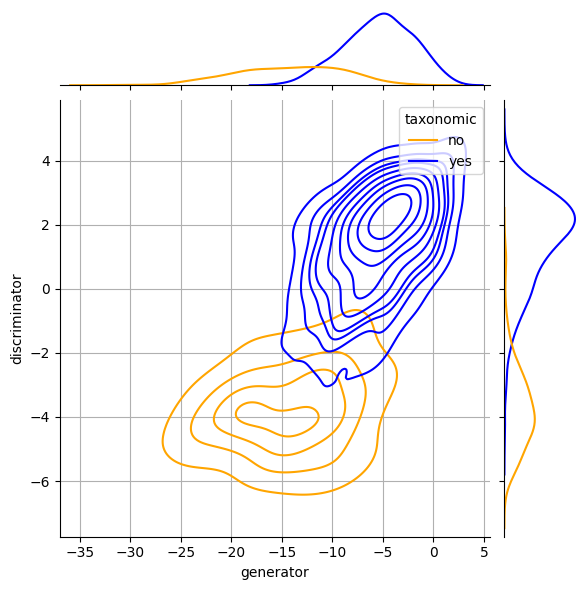

In [52]:
# ORIGINAL
disc = torch.load('../outputs/logodds/gemma-2-2b--disc-few--both.pt', weights_only=True)
gen = torch.load('../outputs/logodds/gemma-2-2b--gen-zero--both.pt', weights_only=True)
viz.plot_correlations(L_test, gen, disc)

Pearson:  0.8393459191369403
Pearson for pos:  0.6409897618756926
Pearson for neg:  0.8039618630667876


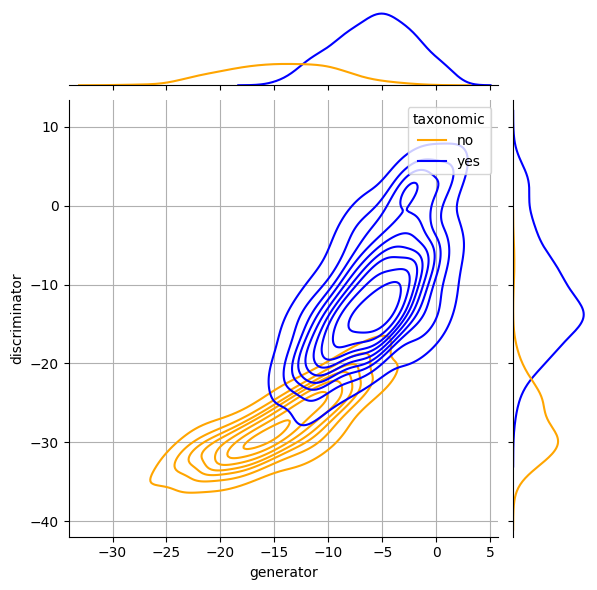

In [54]:

L = utils.load_noun_pair_data() 
L_train, L_test = utils.split_train_test_no_overlap_both(L)
disc = torch.load('../outputs/logodds/v3-delta5-no-overlap-both-epoch4--disc-few--both.pt', weights_only=True)
gen = torch.load('../outputs/logodds/v3-delta5-no-overlap-both-epoch4--gen-zero--both.pt', weights_only=True)
viz.plot_correlations(L_test, gen, disc)

In [18]:

L = utils.load_noun_pair_data() 
L_train, L_test = utils.split_train_test_no_overlap_both(L)


In [57]:
# Look at trivia-qa subset

In [21]:
disc = torch.load('../outputs/logodds/gemma-2-2b--trivia-qa--disc-few.pt', weights_only=True)
gen = torch.load('../outputs/logodds/gemma-2-2b--trivia-qa--gen-zero.pt', weights_only=True)



In [22]:
from collections import namedtuple
I = namedtuple("Item", "taxonomic")

In [23]:
Lt = [I('yes') for i in range(len(disc))]

# Now, how well does fine-tuning on 

Pearson:  0.14927258300660268


ValueError: `x` and `y` must have length at least 2.

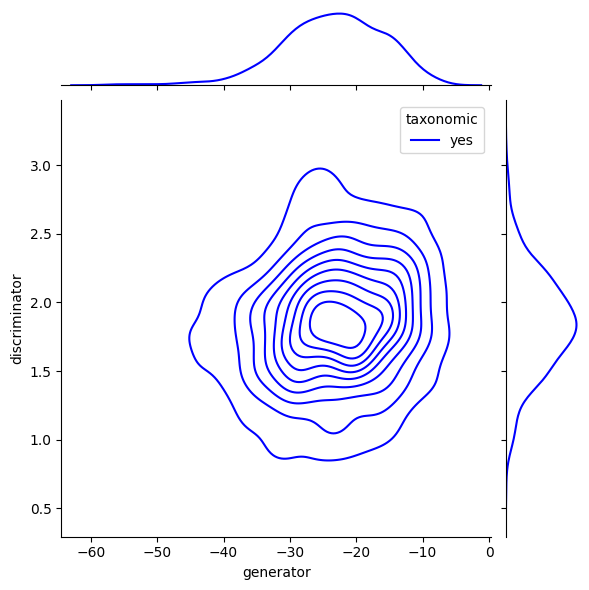

In [25]:
viz.plot_correlations(Lt, gen, disc)

In [26]:
disc = torch.load('../outputs/logodds/v3-delta5-epoch5--trivia-qa--disc-few.pt', weights_only=True)
gen = torch.load('../outputs/logodds/v3-delta5-epoch5--trivia-qa--gen-zero.pt', weights_only=True)



Pearson:  0.3558945768197636


ValueError: `x` and `y` must have length at least 2.

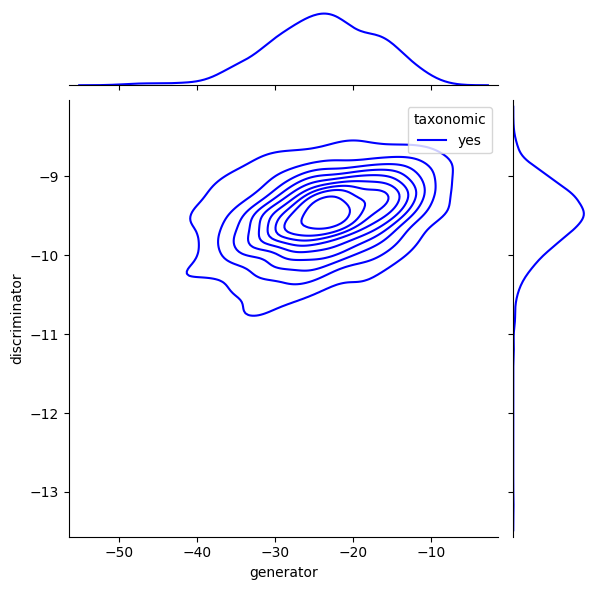

In [27]:
viz.plot_correlations(Lt, gen, disc)

# Notice that even the model fine-tuned on hypernym task improves correlation on trivia-qa.
# How well does training on trivia-qa do on hypernym?

In [12]:
# How well does the trivia-qa trained model do on hypernymy?


In [34]:
L = utils.load_noun_pair_data() 
L_train, L_test = utils.split_train_test(L)

In [35]:
disc = torch.load('../outputs/logodds/v3-delta59--trivia-qa--hypernym--disc-few.pt', weights_only=True)
gen = torch.load('../outputs/logodds/v3-delta59--trivia-qa--hypernym--gen-zero.pt', weights_only=True)


In [36]:
len(L_test)

1018

Pearson:  0.7763978109217111
Pearson for pos:  0.5722935572684087
Pearson for neg:  0.5051118725051038


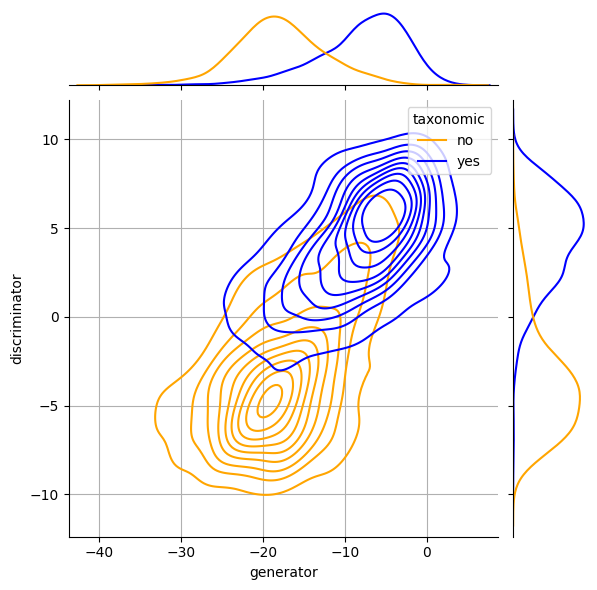

In [37]:
viz.plot_correlations(L_test, gen, disc)

In [ ]:
L = utils.load_noun_pair_data() 
L_train, L_test = utils.split_train_test_no_overlap_both(L)

In [38]:
# Now, triviaqa on triviaqa


In [41]:
disc = torch.load('../outputs/logodds/v3-delta59--trivia-qa--trivia-qa--disc-few.pt', weights_only=True)
gen = torch.load('../outputs/logodds/v3-delta59--trivia-qa--trivia-qa--gen-zero.pt', weights_only=True)

from collections import namedtuple
I = namedtuple("Item", "taxonomic")

Lt = [I('yes') for i in range(len(disc))]

Pearson:  0.7305087049247352


ValueError: `x` and `y` must have length at least 2.

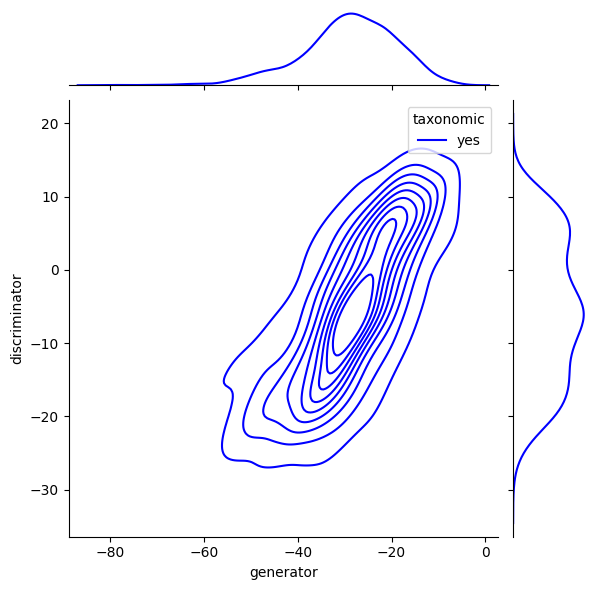

In [42]:
viz.plot_correlations(Lt, gen, disc)

Pearson:  0.7305087049247352


ValueError: `x` and `y` must have length at least 2.

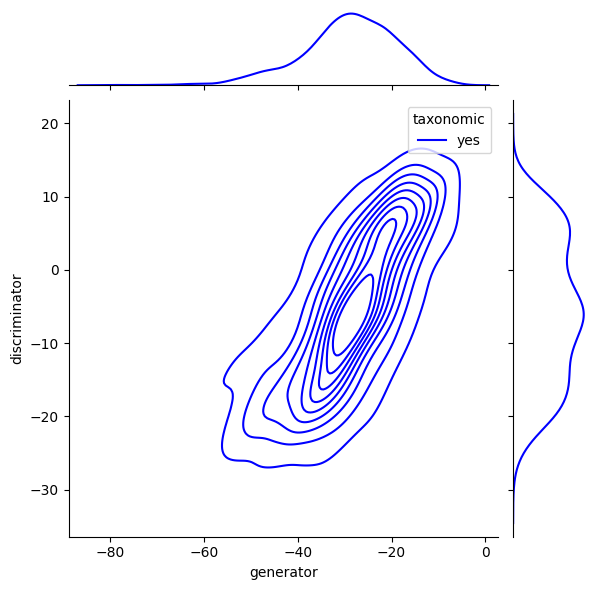

In [42]:
viz.plot_correlations(Lt, gen, disc)

Pearson:  0.7305087049247352


ValueError: `x` and `y` must have length at least 2.

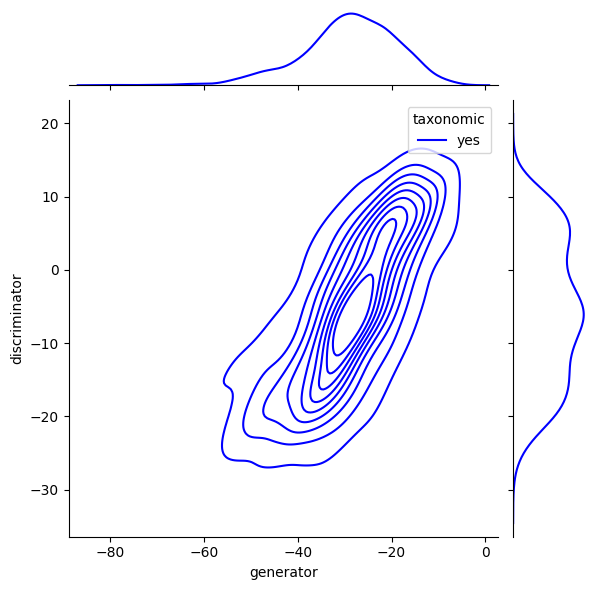

In [42]:
viz.plot_correlations(Lt, gen, disc)

Pearson:  0.7305087049247352


ValueError: `x` and `y` must have length at least 2.

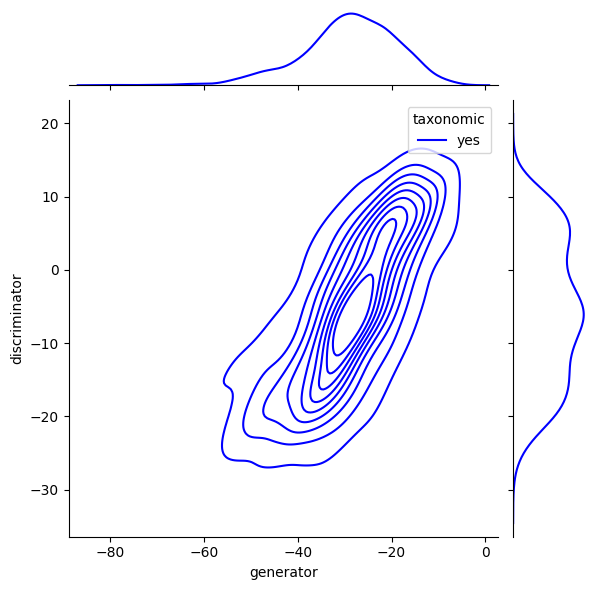

In [42]:
viz.plot_correlations(Lt, gen, disc)

# Next , swords experiments


In [5]:
trainset, testset = utils.load_swords_data(seed=0)

In [15]:
disc = torch.load('../outputs/logodds/gemma-2-2b--swords--disc-few.pt', weights_only=True)
gen = torch.load('../outputs/logodds/gemma-2-2b--swords--gen-zero.pt', weights_only=True)

from collections import namedtuple
I = namedtuple("Item", "taxonomic")
Lt = [I(i.synonym) for i in testset]

Pearson:  0.2945749317939004
Pearson for pos:  0.16606726617867348
Pearson for neg:  0.16461855601498104


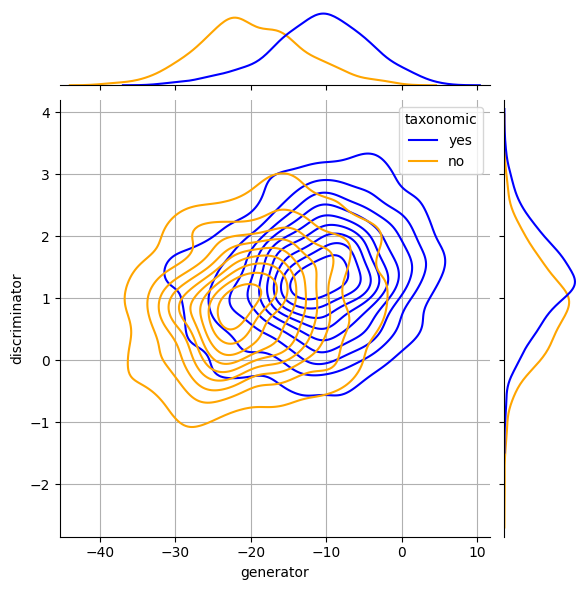

In [16]:
viz.plot_correlations(Lt, gen, disc)

# Now, trained model via ranking:

Pearson:  0.033582165874425134
Pearson for pos:  0.05088988840706836
Pearson for neg:  0.022172930425794327


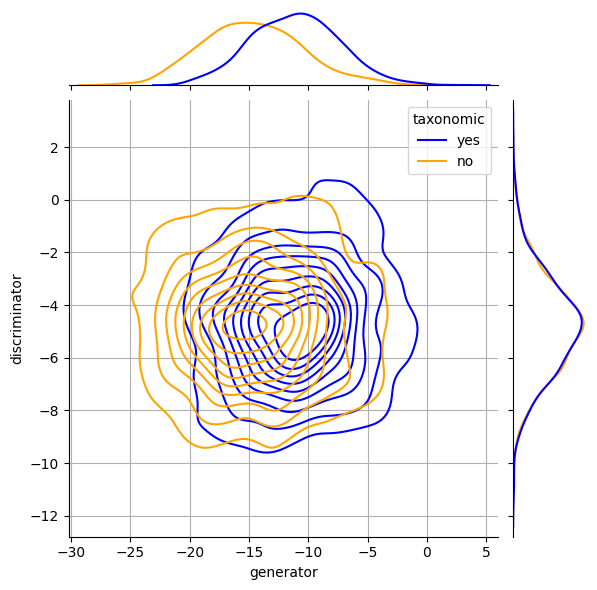

In [26]:
disc = torch.load('../outputs/logodds/v3-delta5-epoch4--swords--swords--disc-few.pt', weights_only=True)
gen = torch.load('../outputs/logodds/v3-delta5-epoch4--swords--swords--gen-zero.pt', weights_only=True)

from collections import namedtuple
I = namedtuple("Item", "taxonomic")
Lt = [I(i.synonym) for i in testset]
viz.plot_correlations(Lt, gen, disc)

In [19]:
disc = torch.load('../outputs/logodds/v3-delta5-epoch1--disc-few.pt', weights_only=True)
gen = torch.load('../outputs/logodds/v3-delta5-epoch1--gen-zero.pt', weights_only=True)


1018

Pearson:  0.09678871085995826
Pearson for pos:  0.1383752995568356
Pearson for neg:  0.05996540692302933


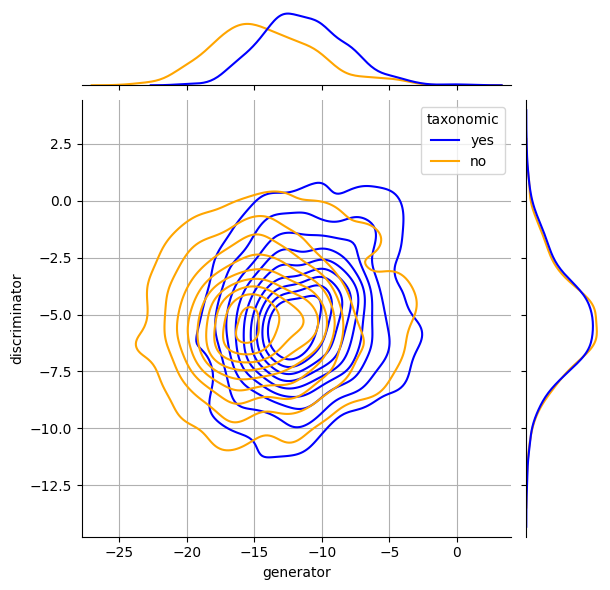

In [27]:
disc = torch.load('../outputs/logodds/v3-delta5-epoch9--swords--swords--disc-few.pt', weights_only=True)
gen = torch.load('../outputs/logodds/v3-delta5-epoch9--swords--swords--gen-zero.pt', weights_only=True)

from collections import namedtuple
I = namedtuple("Item", "taxonomic")
Lt = [I(i.synonym) for i in testset]
viz.plot_correlations(Lt, gen, disc)

# what is wrong???

26

26

1524